In [1]:
from netCDF4 import Dataset
import csv
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 


%matplotlib inline

In [2]:
df = pd.read_csv('basicStatWithWave.txt', delimiter = '|')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
df.keys()

Index(['data Range', 'LAT', 'LON', 'mean wspd diff', 'std. wspd diff',
       'corr. wspd', 'mean wspd diff(wave)', 'std. wspd diff(wave)',
       'corr. wspd(wave)', 'mean wdir diff', 'std. wdir diff', 'corr. wdir',
       'mean wdir diff(wave)', 'std. wdir diff(wave)', 'corr. wdir(wave)'],
      dtype='object')

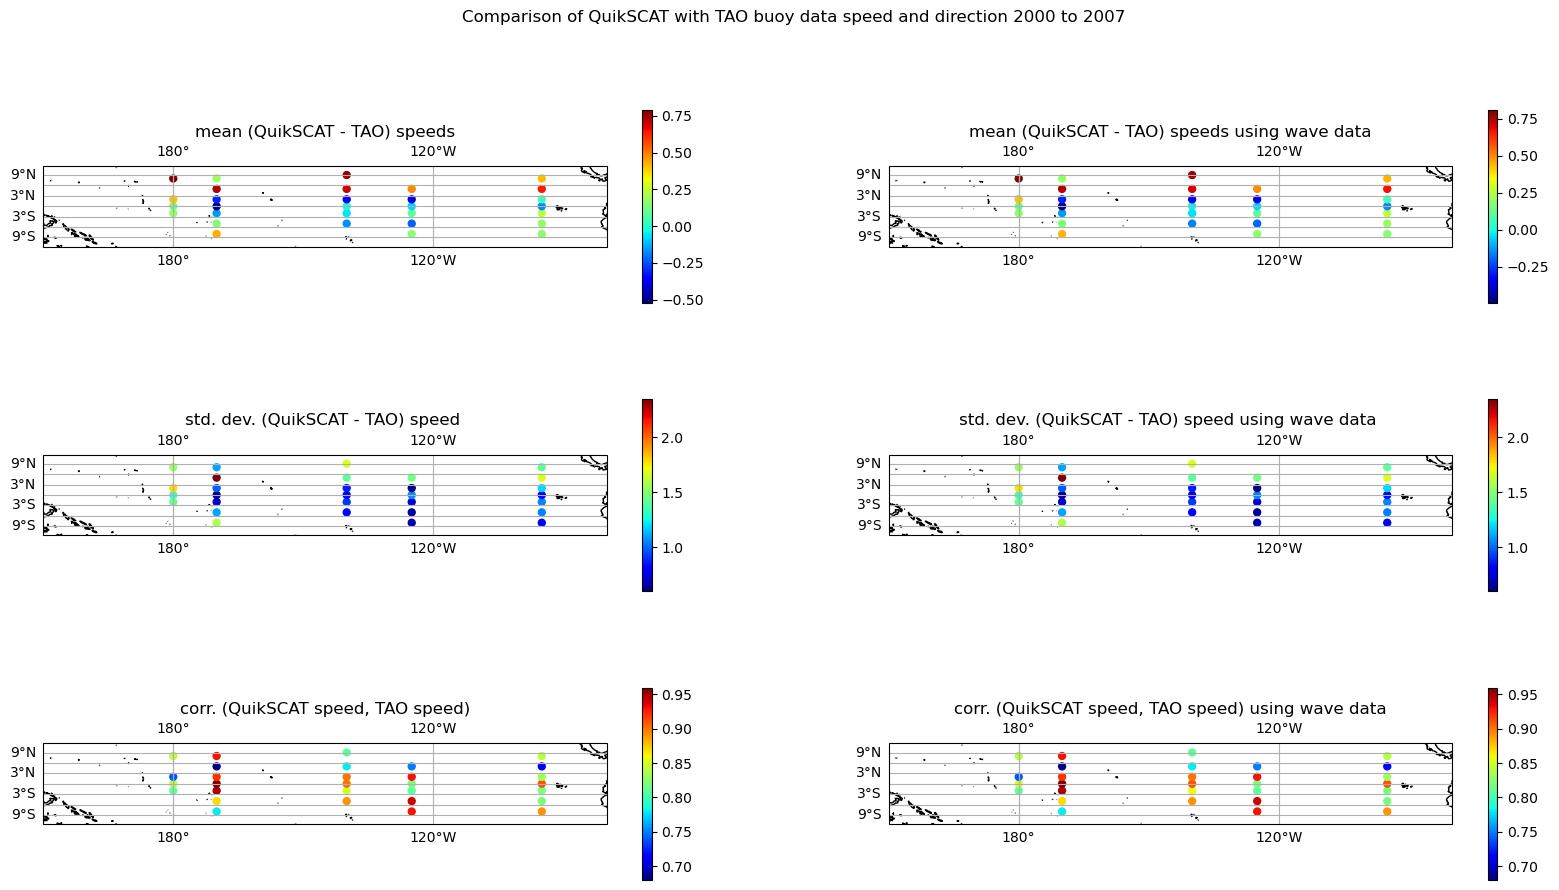

In [4]:
fig, axes = plt.subplots(nrows = 3, 
                         ncols =2, 
                         figsize = (20,10),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180), "aspect": 0.8},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

##########################################################################
ax = axes[0,0]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['mean wspd diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('mean (QuikSCAT - TAO) speeds')

##########################################################################
ax = axes[1,0]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['std. wspd diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('std. dev. (QuikSCAT - TAO) speed ')

##########################################################################
ax = axes[2,0]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['corr. wspd'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('corr. (QuikSCAT speed, TAO speed)')

##########################################################################

##########################################################################
ax = axes[0,1]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['mean wspd diff(wave)'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('mean (QuikSCAT - TAO) speeds using wave data')

##########################################################################
ax = axes[1,1]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['std. wspd diff(wave)'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('std. dev. (QuikSCAT - TAO) speed using wave data ')

##########################################################################
ax = axes[2,1]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['LON'])%360, 
                df['LAT'], 
                s= 25, 
                c=df['corr. wspd(wave)'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('corr. (QuikSCAT speed, TAO speed) using wave data')

##########################################################################
plt.suptitle('Comparison of QuikSCAT with TAO buoy data speed and direction 2000 to 2007')
plt.savefig('Basic_Statistic_withWave.png', dpi=100)


In [7]:
df2 = pd.read_csv('wavePoints.txt', delimiter = '|')
df2.rename(columns=lambda x: x.strip(), inplace=True)

In [11]:
df2.keys()

Index(['LAT', 'LON', 'num. matchup', 'num. matchup with wave',
       'percent of data with wave'],
      dtype='object')

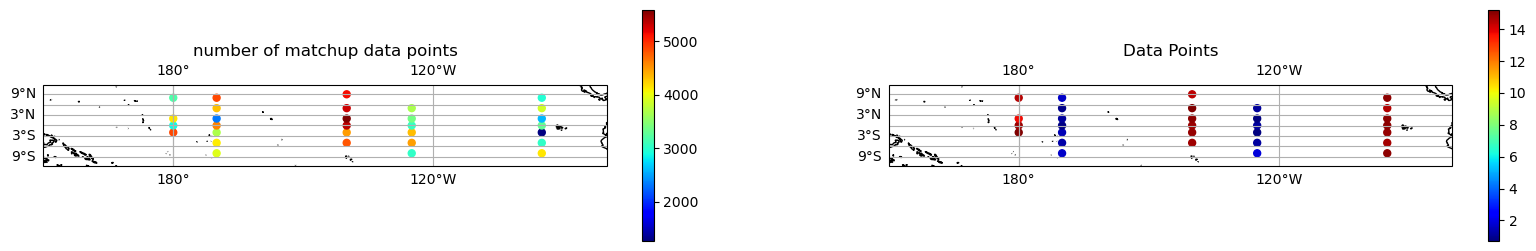

In [15]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols =2, 
                         figsize = (20,3),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180), "aspect": 0.8},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

##########################################################################
ax = axes[0]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df2['LON'])%360, 
                df2['LAT'], 
                s= 25, 
                c=df2['num. matchup'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('number of matchup data points')

##########################################################################
ax = axes[1]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df2['LON'])%360, 
                df2['LAT'], 
                s= 25, 
                c=df2['percent of data with wave'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('Data Points')
plt.savefig('data_points_with_wave.png', dpi=100)